<a href="https://colab.research.google.com/github/SahanaSg1729/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv('dataset.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


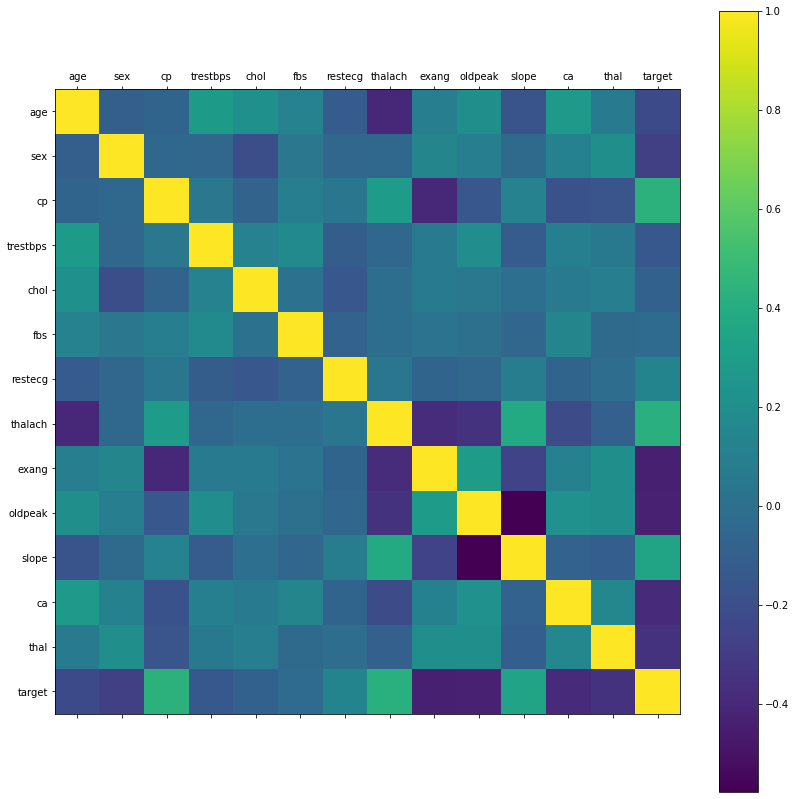

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a4a6f6310>,
      dtype=object)

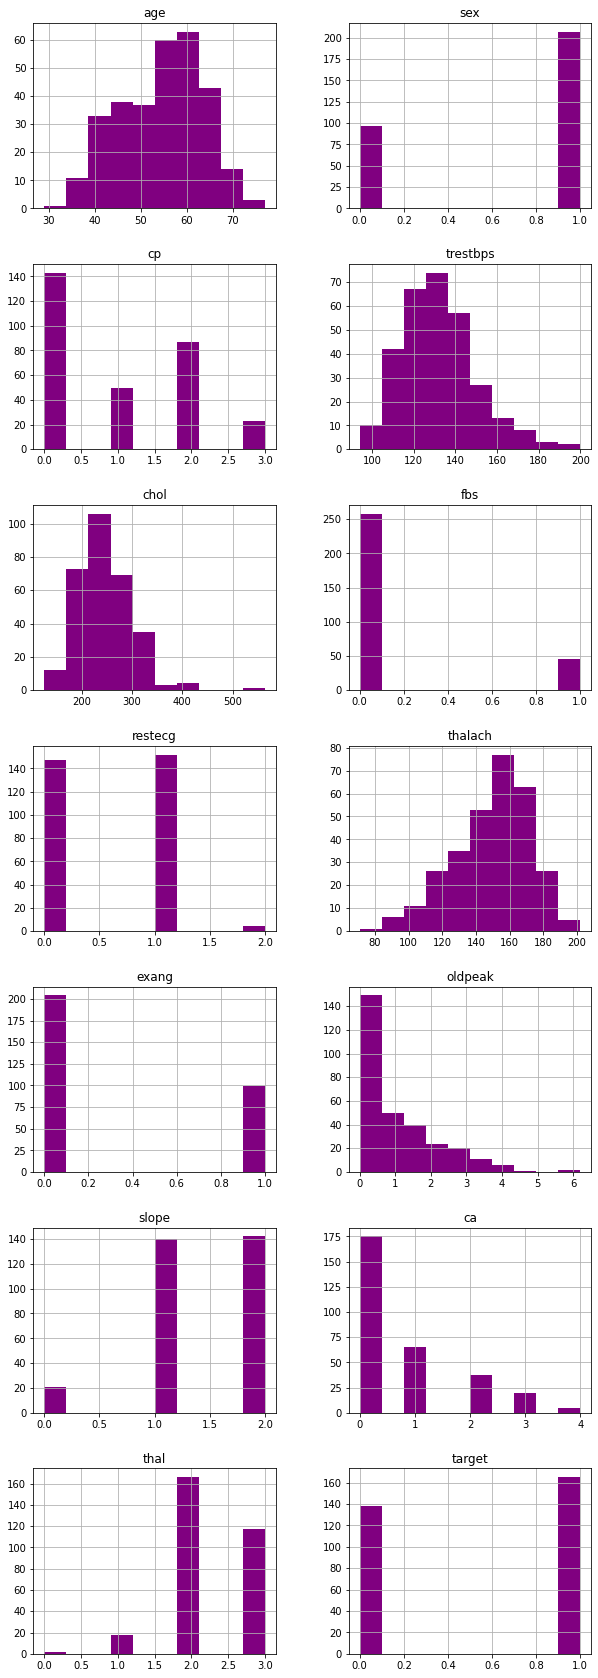

In [ ]:
dataset.hist(layout = (7, 2),
            figsize = (10, 30),
            color=['purple'])

Text(0.5, 1.0, 'Count of each Target Class')

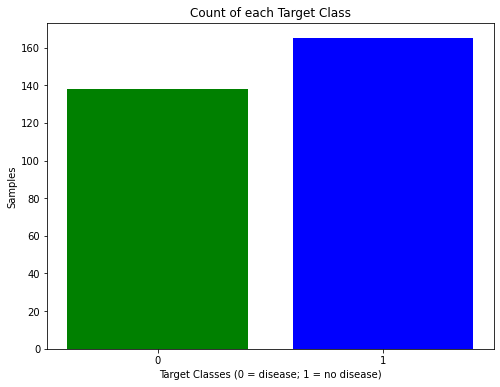

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes (0 = disease; 1 = no disease)')
plt.ylabel('Samples')
plt.title('Count of each Target Class')

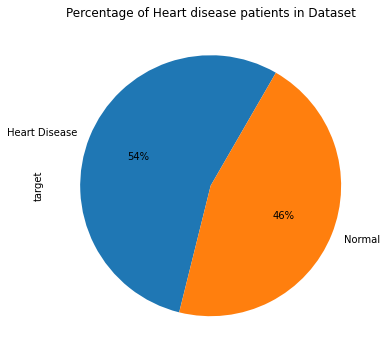

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

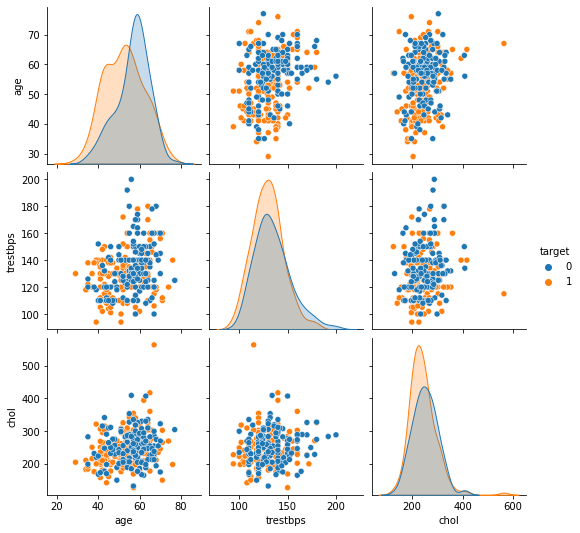

In [ ]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

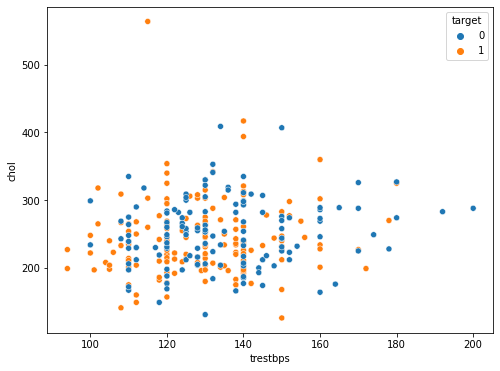

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = dataset)

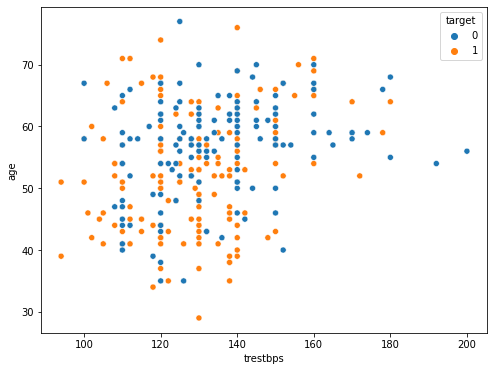

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = dataset)

In [ ]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
print("Training K-Nearest Neighbors")
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Training K-Nearest Neighbors


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

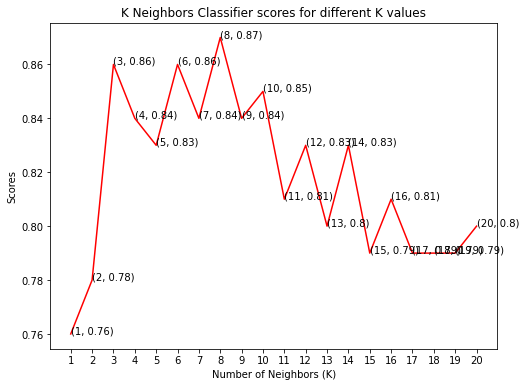

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


In [ ]:
print("Training Random Forest")
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Training Random Forest


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

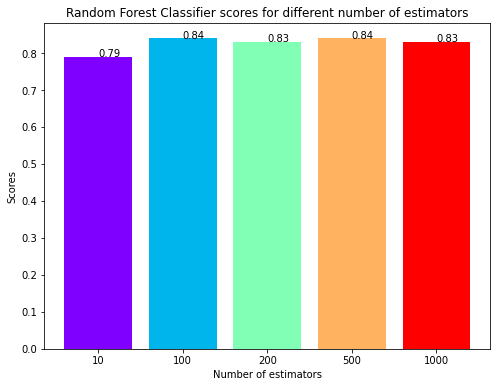

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [ ]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


In [ ]:
print('Training Decision Tree')
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Training Decision Tree


Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

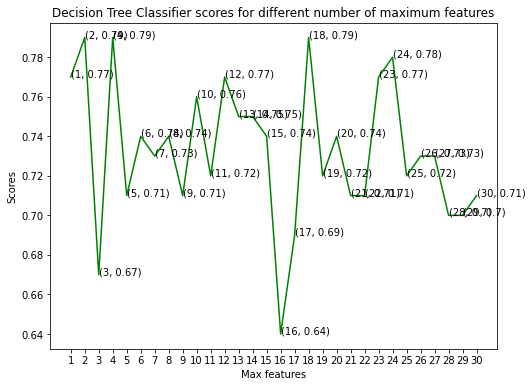

In [ ]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [ ]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


In [ ]:
print('Training Naive Bayes')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)
score_nb = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

Training Naive Bayes
The accuracy score achieved using Naive Bayes is: 85.25 %
